## CIIC5018 / ICOM5018
## Network Security and Cryptography
## Project 2: Playfair Cipher and Vigenere Cipher
### Francis Jose Patron Fidalgo (802180833)
### sec: 060
### 09/02/2022

## Letter & Number Conversion Hash Maps
Python maps used to change between Letters and Numbers (example: A = 0, B = 1, C = 2, etc.)

In [16]:
import string
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

letter2num = dict(zip(string.ascii_uppercase, range(0, 26)))
num2letter = {v: k for k, v in letter2num.items()}

## Text Preparation Function   
Change the plain text into the input we want. All uppercase English letters.


In [17]:
def prepare_text(input_txt: str) -> str:
    return ''.join([c.upper() for c in input_txt if c.isalpha()])

## Playfair Functions

In [18]:
def generate_matrix(cypher_key: str) -> list:
    # remove any duplicate letters
    cypher_key = prepare_text(''.join(OrderedDict.fromkeys(cypher_key)))
    cypher_key.replace('J', 'I')
    matrix = [[None for _ in range(5)] for _ in range(5)] # create 5x5 matrix
    row = 0
    # add the rest of the English letters
    all_letters = [letter for letter in cypher_key]
    for letter in string.ascii_uppercase.replace('J', 'I'):
        if not letter in all_letters:
            all_letters.append(letter)
    # add everything to the matrix
    for i, letter in enumerate(all_letters):
        if i % 5 == 0 and i != 0:
            row += 1
        matrix[row][i % 5] = letter
    return matrix

In [19]:
def get_letter_location(letter: str, matrix: list) -> tuple:
    for row in range(len(matrix)):
        for col in range(len(matrix)):
            if letter == matrix[row][col]:
                return row, col

In [20]:
def playfair_encryption(plain_text: str, cypher_key: str) -> str:
    # put plain text in uppercase English letters
    plain_text = prepare_text(plain_text).replace('J', 'I')
    # separate all letters in pairs
    separated_letters = []
    i = 0
    while i < len(plain_text):
        # check to see there are consecutive letters
        if i == len(plain_text)-1 or plain_text[i] == plain_text[i+1]:
            separated_letters.append(plain_text[i]+'X')
        else:
            separated_letters.append(plain_text[i]+plain_text[i+1])
            i+=1
        i+=1

    # get cypher matrix
    cypher_matrix = generate_matrix(cypher_key)
    encrypter_pairs = []
    # go through each letter pair
    for pair in separated_letters:
        # get locations for each pair
        row1, col1 = get_letter_location(pair[0], cypher_matrix)
        row2, col2 = get_letter_location(pair[1], cypher_matrix)

        # Two plaintext letters that fall in the same row of the matrix are each replaced
        # by the letter to the right, with the first element of the row circularly following
        # the last.
        if row1 == row2:
            encrypter_pairs.append(cypher_matrix[row1][(col1+1) % 5]+cypher_matrix[row2][(col2+1) % 5])
        
        # Two plaintext letters that fall in the same column are each replaced by the
        # letter beneath, with the top element of the column circularly following the last.
        elif col1 == col2:
            encrypter_pairs.append(cypher_matrix[(row1+1) % 5][col1]+cypher_matrix[(row2+1) % 5][col2])
        
        # Otherwise, each plaintext letter in a pair is replaced by the letter that lies in
        # its own row and the column occupied by the other plaintext letter.
        else:
            encrypter_pairs.append(cypher_matrix[row1][col2]+cypher_matrix[row2][col1])

    return ''.join(encrypter_pairs)   

In [21]:
def playfair_decryption(cypher_text: str, cypher_key: str) -> str:
    # get cypher matrix
    cypher_matrix = generate_matrix(cypher_key)

    # separate into pairs
    separated_letters = []
    i = 0
    while i < len(cypher_text)-1:
        separated_letters.append(cypher_text[i]+cypher_text[i+1])
        i+=2

    plain_text_pairs = []
    # go through each letter pair)
    for pair in separated_letters:
        # get locations for each pair
        row1, col1 = get_letter_location(pair[0], cypher_matrix)
        row2, col2 = get_letter_location(pair[1], cypher_matrix)

        # Two plaintext letters that fall in the same row of the matrix are each replaced
        # by the letter to the right, with the first element of the row circularly following
        # the last.
        if row1 == row2:
            plain_text_pairs.append(cypher_matrix[row1][(col1-1) % 5]+cypher_matrix[row2][(col2-1) % 5])
        
        # Two plaintext letters that fall in the same column are each replaced by the
        # letter beneath, with the top element of the column circularly following the last.
        elif col1 == col2:
            plain_text_pairs.append(cypher_matrix[(row1-1) % 5][col1]+cypher_matrix[(row2-1) % 5][col2])
        
        # Otherwise, each plaintext letter in a pair is replaced by the letter that lies in
        # its own row and the column occupied by the other plaintext letter.
        else:
            plain_text_pairs.append(cypher_matrix[row1][col2]+cypher_matrix[row2][col1])

    return ''.join(plain_text_pairs).replace('X', '')

## Vigenere Functions


In [22]:
def encrypt_indivicual_letter(letter: str, key_letter: str) -> str:
    cypher_num = letter2num[letter] + letter2num[key_letter]
    return num2letter[cypher_num % 26]

In [23]:
def decrypt_individual_letter(letter: str, key_letter: str) -> str:
    cypher_num = letter2num[letter] - letter2num[key_letter]
    return num2letter[cypher_num % 26]

In [24]:
def vigenere_encryption(plain_text: str, cypher_key: str) -> str:
    # format text
    plain_text = prepare_text(plain_text)
    cypher_key = prepare_text(cypher_key)

    cypher_chars = []
    # encrypt each letter
    for i, letter in enumerate(plain_text):
        cypher_chars.append(encrypt_indivicual_letter(letter, cypher_key[i % len(cypher_key)]))

    return ''.join(cypher_chars)

In [25]:
def vigenere_decryption(cypher_text: str, cypher_key: str) -> str:
    # format text
    cypher_text = prepare_text(cypher_text)
    cypher_key = prepare_text(cypher_key)

    plain_text_chars = []
    for i, letter in enumerate(cypher_text):
        plain_text_chars.append(decrypt_individual_letter(letter, cypher_key[i % len(cypher_key)]))
    
    return ''.join(plain_text_chars)

## Relative Frequencies Functions

In [26]:
def get_letter_freq(text: str) -> map:
    # convert to only uppercase english letters
    plain_text = prepare_text(text)
    # create map that contains all letters & the times repeated in the text, start all at 0
    letter_freq = dict(zip(string.ascii_uppercase, [0]*len(string.ascii_uppercase)))
    # iterate over the text
    for letter in plain_text:
        # add 1 to the frequencies map
        letter_freq[letter] += 1

    total_letters = sum(letter_freq.values())
    for letter, freq in letter_freq.items():
        letter_freq[letter] = round(freq/total_letters * 100, 3)

    i = 12.702
    for letter, freq in letter_freq.items():
        letter_freq[letter] = round(freq/i, 1)
    return letter_freq

In [27]:
def generate_plot(plain_text, playfair, vigenere):
    plt.figure(figsize = (20, 10))

    # plain text
    letters = list(num2letter.keys())
    frequency = list(plain_text.values())
    frequency.sort(reverse=True)
    poly = np.polyfit(letters, frequency,5)
    poly_y = np.poly1d(poly)(letters)
    plt.plot(letters, poly_y)
    plt.plot(letters, poly_y, '-r', label='plain text')

    # playfair
    frequency = list(playfair.values())
    frequency.sort(reverse=True)
    poly = np.polyfit(letters, frequency,5)
    poly_y = np.poly1d(poly)(letters)
    plt.plot(letters, poly_y)
    plt.plot(letters, poly_y, '-g', label='playfair')

    # vigenere
    frequency = list(vigenere.values())
    frequency.sort(reverse=True)
    poly = np.polyfit(letters, frequency,5)
    poly_y = np.poly1d(poly)(letters)
    plt.plot(letters, poly_y, '-b', label='vigenere')
    
    plt.legend(loc="upper right")
    plt.xlabel('Frequency ranked letters (decreasing frequency)')
    plt.ylabel("Normalized Relative Frequency")
    plt.title("Relative Frequency of Occurance of Letters")

    plt.show()

## Test Functions

### Test 1: Playfair Cypher   
encrypt and decrypt using playfair cypher

In [28]:
plain_text = 'wearediscoveredsaveyourself'
cypher_key = 'MAXFRESH'
cypher_text = playfair_encryption(plain_text, cypher_key)
print('-------- Playfair Encryption --------')
print(f'plain text: {plain_text}\ncypher key: {cypher_key}\ncypher text: {cypher_text}')
new_plain_text = playfair_decryption(cypher_text, cypher_key)
print('-------- Playfair Decryption --------')
print(f'cypher text: {cypher_text}\ncypher key: {cypher_key}\ndecrypted text: {new_plain_text}')

-------- Playfair Encryption --------
plain text: wearediscoveredsaveyourself
cypher key: MAXFRESH
cypher text: UHXMDNGHSTUSMCGESABUNVACCDRF
-------- Playfair Decryption --------
cypher text: UHXMDNGHSTUSMCGESABUNVACCDRF
cypher key: MAXFRESH
decrypted text: WEAREDISCOVEREDSAVEYOURSELF


## Test 2: Vigenere Cypher
encrypt and decrypt using vigenere cypher

In [29]:
plain_text = 'bringthebombtothefifthfloorwheniminposition'
cypher_key = 'MAXFRESH'
cypher_text = playfair_encryption(plain_text, cypher_key)
print('-------- Vigenere Encryption --------')
print(f'plain text: {plain_text}\ncypher key: {cypher_key}\ncypher text: {cypher_text}')
new_plain_text = playfair_decryption(cypher_text, cypher_key)
print('-------- Vigenere Decryption --------')
print(f'cypher text: {cypher_text}\ncypher key: {cypher_key}\ndecrypted text: {new_plain_text}')

-------- Vigenere Encryption --------
plain text: bringthebombtothefifthfloorwheniminposition
cypher key: MAXFRESH
cypher text: CFDPLOBSSQFENPPCBMKXPCRKPATAXIDUDXDPQPHGPLPO
-------- Vigenere Decryption --------
cypher text: CFDPLOBSSQFENPPCBMKXPCRKPATAXIDUDXDPQPHGPLPO
cypher key: MAXFRESH
decrypted text: BRINGTHEBOMBTOTHEFIFTHFLOORWHENIMINPOSITION


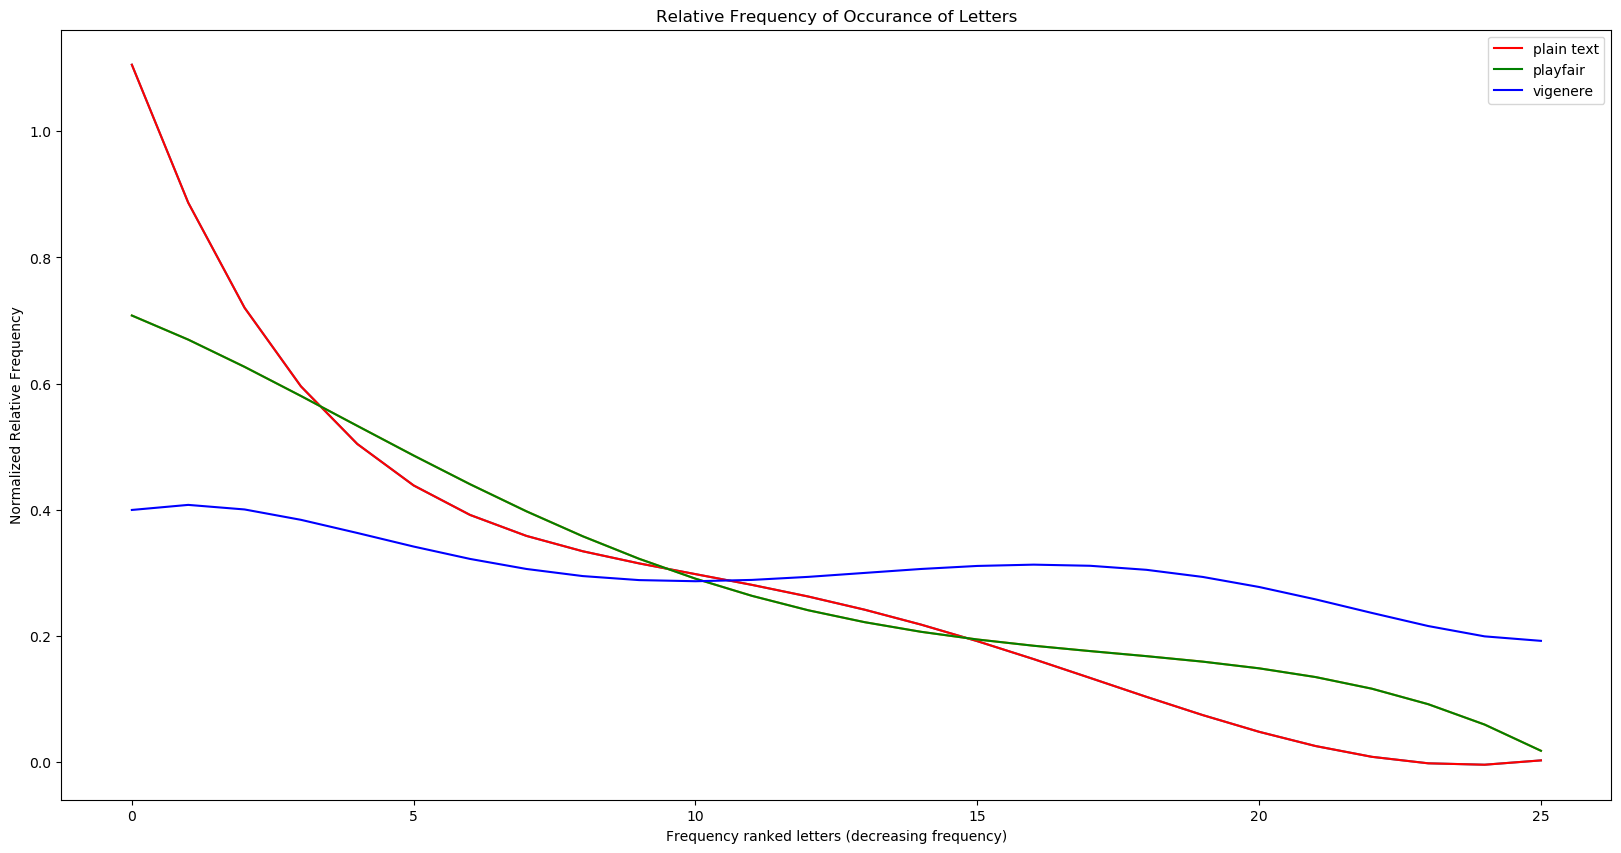

In [30]:
word_doc = '''CIIC5018 / ICOM5018
Network Security and Cryptography
Project 2: Playfair Cipher and Vigenere Cipher
Overview
In this exercise, you will need to design and implement Playfair cipher and
Vigenere cipher, and then compare the relative frequency of letters in the plaintext
and cyphertext. The programming language is Python.
Document requirements
To work on the exercise, you will need to prepare three documents following the
guidelines below.
1. A design document
a. Cover page
i. It shall include the title of the document, your name, student
ID, department and university information, etc.
b. Table of content
c. Section 1: The Playfair cipher (encryption and decryption)
i. The input of encryption is a plaintext and a key
1. The plaintext must be the output of the procedure
described in section 1 of Project 1
ii. The return of encryption is a ciphertext
iii. The input of decryption is a cyphertext and a key
iv. The return of decryption is a plaintext
v. Explain your design to deal with the situation that two input
letters are the same
vi. Explain your design to deal with the situation that the last
plaintext is a single letter
d. Section 2: The Vigenere cipher (encryption and decryption)
i. The input of encryption is a plaintext and a key
1. The plaintext must be the output of the procedure
described in section 1 of Project 1
ii. The return of encryption is a ciphertext
iii. The input of decryption is a cyphertext and a key
iv. The return of decryption is a plaintext
e. Section 3: The relative frequencies of letters in a string
i. The input is a string that contains only capitalized English
letters
ii. The output is a sorted (decreasing order) array of relative
frequencies of letters
f. References
i. Cite at least 5 references
ii. The link to your YouTube video must be included here
2. A Python program saved in a Jupyter notebook
a. The following functions shall be implemented based on the pseudo
codes in the design document:
i. The Playfair encryption function.
ii. The Playfair decryption function.
iii. The Vigenere encryption function.
iv. The Vigenere decryption function.
v. The relative frequency function.
vi. Some test functions.
b. To verify your encryption and decryption functions, you must show
that the plaintext can be accurately recovered after you used the
same key to encrypt and decrypt
c. To test the Playfair cipher, you shall use key “MAXFRESH”.
d. To test the Vigenere cipher, you shall use repeated key
“MAXFRESH”.
e. To show the result of the relative frequency function. You must
i. use all the text in this Word document as the input of the text
processing procedure and generate the plaintext, then
ii. encrypt the plaintext using the Playfair cipher to generate
ciphertext 1, then
iii. encrypt the plaintext using the Vigenere cipher to generate
ciphertext 2, then
iv. generate the relative frequencies for plaintext, ciphertext 1
and ciphertext 2, and finally
v. plot a figure to compare relative frequencies (similar to
Figure 2.6 in the textbook).
3. A YouTube video to walk through your code
a. In the video, you shall go through Step 2.c to verify your encryption
and decryption functions of the Playfair cipher.
b. In the video, you shall go through Step 2.d to verify your encryption
and decryption functions of the Vigenere cipher.
c. In the video, you shall go through Step 2.e and show the figure of
relative frequencies.
d. Upload the video to YouTube, set the video as private, then share it
to me (Kejie.lu@upr.edu)
Submission
Submit a single zip file that includes:
1. the design document
2. the Jupyter notebook
Evaluation
1. Rubrics are used in the evaluation.
2. You must carefully review all rubrics before preparing for the documents.'''

playfair_encripted_text = playfair_encryption(word_doc, cypher_key='MAXFRESH')
vigenere_encripted_text = vigenere_encryption(word_doc, cypher_key='MAXFRESH')

# calcultate frequencies
plain_text_freq = get_letter_freq(word_doc)
playfair_freq = get_letter_freq(playfair_encripted_text)
vigenere_freq = get_letter_freq(vigenere_encripted_text)

# plot
g-enerate_plot(plain_text_freq, playfair_freq, vigenere_freq)